In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier, XGBRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [2]:
df = pd.read_csv('data/MLE-Assignment.csv')
df = df.drop(columns=['hsi_id'])
df.head()

,0,1,2,3,4,5,6,7,8,9,...,439,440,441,442,443,444,445,446,447,vomitoxin_ppb
0,0.416181,0.396844,0.408985,0.372865,0.385293,0.365390,0.355226,0.343350,0.344837,0.361567,...,0.710280,0.717482,0.715078,0.705379,0.696691,0.692793,0.711369,0.697679,0.704520,1100.0
1,0.415797,0.402956,0.402564,0.396014,0.397192,0.389634,0.375671,0.363689,0.373883,0.359674,...,0.684011,0.697271,0.701995,0.696077,0.701012,0.677418,0.696921,0.696544,0.689054,1000.0
2,0.389023,0.371206,0.373098,0.373872,0.361056,0.349709,0.333882,0.330841,0.328925,0.323854,...,0.683054,0.669286,0.663179,0.676165,0.676591,0.655951,0.658945,0.670989,0.665176,1300.0
3,0.468837,0.473255,0.462949,0.459335,0.461672,0.459824,0.458194,0.427737,0.415360,0.413106,...,0.742782,0.730801,0.736787,0.730044,0.751437,0.738497,0.742446,0.754657,0.733474,1300.0
4,0.483352,0.487274,0.469153,0.487648,0.464026,0.451152,0.458229,0.440782,0.426193,0.430482,...,0.770227,0.773013,0.761431,0.763488,0.762473,0.744012,0.775486,0.760431,0.751988,220.0


In [3]:
df['vomitoxin_ppb'].value_counts()

vomitoxin_ppb
0.0       88
200.0     41
300.0     27
500.0     25
100.0     24
          ..
250.0      1
2300.0     1
6100.0     1
4000.0     1
9300.0     1
Name: count, Length: 128, dtype: int64

In [4]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,...,439,440,441,442,443,444,445,446,447,vomitoxin_ppb
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,...,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,0.443118,0.440761,0.433814,0.426122,0.418990,0.412432,0.405868,0.399815,0.394038,0.389664,...,0.741255,0.740818,0.740459,0.739758,0.739850,0.738738,0.738298,0.737599,0.738099,3410.006000
std,0.044719,0.045520,0.045764,0.046070,0.045405,0.044727,0.044528,0.043773,0.043659,0.043442,...,0.053479,0.053695,0.053812,0.053666,0.053487,0.053601,0.054014,0.054136,0.054297,13095.803483
min,0.311182,0.295321,0.284064,0.282054,0.296702,0.286860,0.262876,0.278523,0.255529,0.261459,...,0.562662,0.585011,0.558412,0.571735,0.575259,0.571767,0.577803,0.576985,0.562302,0.000000
25%,0.410456,0.404310,0.397038,0.389029,0.382102,0.377157,0.369620,0.364823,0.360634,0.355246,...,0.702105,0.703701,0.702988,0.700889,0.701690,0.700638,0.698655,0.698107,0.699673,137.500000
50%,0.449105,0.442651,0.434215,0.425074,0.417075,0.411872,0.405443,0.397917,0.393803,0.387211,...,0.743857,0.745922,0.745062,0.743991,0.744004,0.743965,0.743301,0.745216,0.745733,500.000000
75%,0.480245,0.478822,0.473158,0.464947,0.459232,0.452198,0.444384,0.438728,0.431165,0.427039,...,0.777884,0.776210,0.777069,0.774759,0.775698,0.775686,0.775621,0.774635,0.774310,1700.000000
max,0.556287,0.530168,0.528774,0.533202,0.511909,0.501786,0.504054,0.490692,0.489272,0.472080,...,0.940642,0.940361,0.939153,0.930366,0.942615,0.945225,0.932812,0.931381,0.957860,131000.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Columns: 449 entries, 0 to vomitoxin_ppb
dtypes: float64(449)
memory usage: 1.7 MB


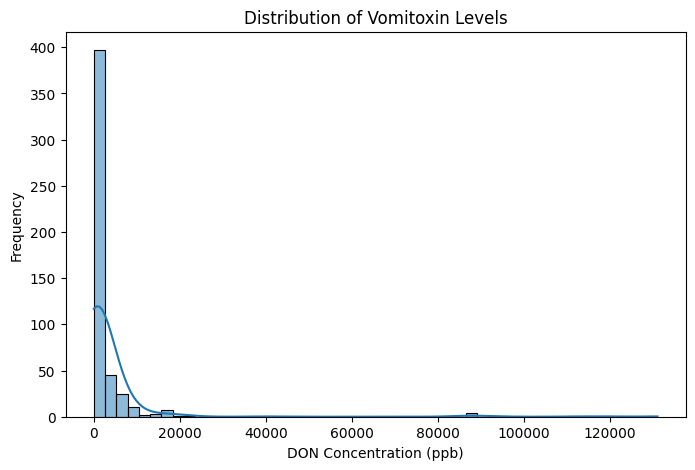

In [8]:
plt.figure(figsize=(8,5))
sns.histplot(df['vomitoxin_ppb'], bins=50, kde=True)
plt.xlabel("DON Concentration (ppb)")
plt.ylabel("Frequency")
plt.title("Distribution of Vomitoxin Levels")
plt.show()

In [9]:
df['log_vomitoxin'] = np.log1p(df['vomitoxin_ppb'])
df['is_contaminated'] = (df['vomitoxin_ppb'] > 0).astype(int)

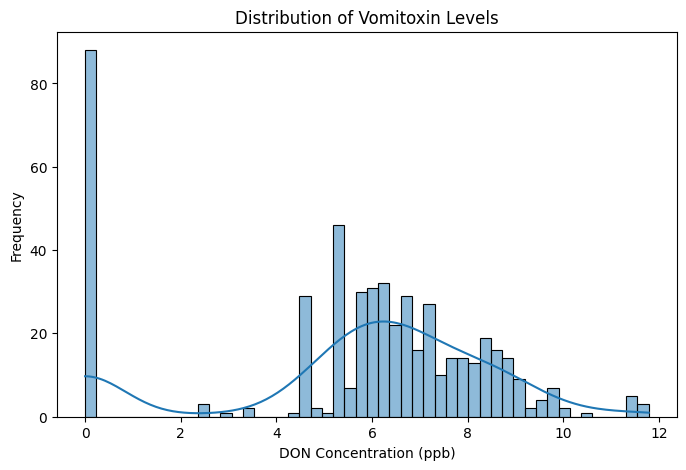

In [10]:
plt.figure(figsize=(8,5))
sns.histplot(df['log_vomitoxin'], bins=50, kde=True)
plt.xlabel("DON Concentration (ppb)")
plt.ylabel("Frequency")
plt.title("Distribution of Vomitoxin Levels")
plt.show()

In [11]:
X = df.drop(columns=['vomitoxin_ppb', 'log_vomitoxin', 'is_contaminated'])
y_class = df['is_contaminated']
X_train, X_test, y_class_train, y_class_test = train_test_split(X, y_class, test_size=0.2, random_state=42)

In [12]:
clf = XGBClassifier(
    n_estimators=200, 
    max_depth=7, 
    learning_rate=0.05,
    colsample_bytree=0.8, 
    subsample=0.8,
    reg_lambda=10, 
    reg_alpha=5, 
    random_state=42
)
clf.fit(X_train, y_class_train)

print("Training Accuracy:", clf.score(X_train, y_class_train))
print("Test Accuracy:", clf.score(X_test, y_class_test))

Training Accuracy: 0.8975
Test Accuracy: 0.85


In [13]:
df_contaminated = df[df['is_contaminated'] == 1]
X_reg = df_contaminated.drop(columns=['vomitoxin_ppb', 'log_vomitoxin', 'is_contaminated'])
y_reg = df_contaminated['log_vomitoxin']

scaler = StandardScaler()
X_reg_scaled = scaler.fit_transform(X_reg)
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg_scaled, y_reg, test_size=0.2, random_state=42)

In [14]:
reg_xgb = XGBRegressor(
    colsample_bytree=0.7, 
    learning_rate=0.01,
    max_depth=6, 
    n_estimators=500, 
    subsample=0.7,
    random_state=42
)
reg_xgb.fit(X_train_reg, y_train_reg)

y_reg_pred = reg_xgb.predict(X_test_reg)
rmse = np.sqrt(mean_squared_error(y_test_reg, y_reg_pred))
mae = mean_absolute_error(y_test_reg, y_reg_pred)
r2 = r2_score(y_test_reg, y_reg_pred)

print(f"XGBoost Regression Model Evaluation 🔹")
print(f"RMSE: {rmse:.4f}")
print(f"MAE: {mae:.4f}")
print(f"R² Score: {r2:.4f}")

XGBoost Regression Model Evaluation 🔹
RMSE: 1.1859
MAE: 0.9268
R² Score: 0.4397


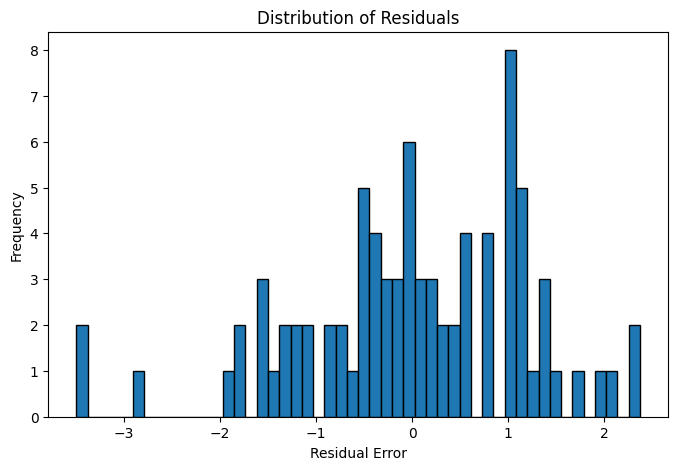

In [15]:
residuals = y_test_reg - y_reg_pred
plt.figure(figsize=(8, 5))
plt.hist(residuals, bins=50, edgecolor='k')
plt.xlabel("Residual Error")
plt.ylabel("Frequency")
plt.title("Distribution of Residuals")
plt.show()


In [17]:
from imblearn.over_sampling import SMOTE
from sklearn.feature_selection import SelectFromModel
from sklearn.calibration import CalibratedClassifierCV

In [18]:
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train_balanced, y_class_train_balanced = smote.fit_resample(X_train, y_class_train)

In [19]:
clf_smote = XGBClassifier(
    n_estimators=200,     
    max_depth=7,           
    learning_rate=0.05,    
    colsample_bytree=0.8,   
    subsample=0.8,         
    reg_lambda=10,         
    reg_alpha=5,           
    random_state=42
)
clf_smote.fit(X_train_balanced, y_class_train_balanced)

print("SMOTE Training Accuracy:", clf_smote.score(X_train_balanced, y_class_train_balanced))
print("SMOTE Test Accuracy:", clf_smote.score(X_test, y_class_test))

SMOTE Training Accuracy: 0.9969418960244648
SMOTE Test Accuracy: 0.71


In [20]:
calibrated_clf = CalibratedClassifierCV(clf_smote, method='sigmoid', cv=3)
calibrated_clf.fit(X_train_balanced, y_class_train_balanced)

CalibratedClassifierCV(cv=3,
                       estimator=XGBClassifier(base_score=None, booster=None,
                                               callbacks=None,
                                               colsample_bylevel=None,
                                               colsample_bynode=None,
                                               colsample_bytree=0.8,
                                               device=None,
                                               early_stopping_rounds=None,
                                               enable_categorical=False,
                                               eval_metric=None,
                                               feature_types=None,
                                               feature_weights=None, gamma=None,
                                               grow_policy=None,
                                               importance_type=None,
                                               interaction_constraints=None,
                                               learning_rate=0.05, max_bin=None,
                                               max_cat_threshold=None,
                                               max_cat_to_onehot=None,
                                               max_delta_step=None, max_depth=7,
                                               max_leaves=None,
                                               min_child_weight=None,
                                               missing=nan,
                                               monotone_constraints=None,
                                               multi_strategy=None,
                                               n_estimators=200, n_jobs=None,
                                               num_parallel_tree=None, ...))

In [21]:
selector = SelectFromModel(clf_smote, threshold="median", prefit=True)
X_train_selected = selector.transform(X_train_balanced)
X_test_selected = selector.transform(X_test)

d:\Imago_AI\.env\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
d:\Imago_AI\.env\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


In [22]:
clf_selected = XGBClassifier(
    n_estimators=200,     
    max_depth=7,           
    learning_rate=0.05,    
    colsample_bytree=0.8,   
    subsample=0.8,         
    reg_lambda=10,         
    reg_alpha=5,           
    random_state=42
)
clf_selected.fit(X_train_selected, y_class_train_balanced)

print("Feature Selection - Training Accuracy:", clf_selected.score(X_train_selected, y_class_train_balanced))
print("Feature Selection - Test Accuracy:", clf_selected.score(X_test_selected, y_class_test))

Feature Selection - Training Accuracy: 0.9938837920489296
Feature Selection - Test Accuracy: 0.71


In [23]:
X_train_reg_selected = selector.transform(X_train_reg)
X_test_reg_selected = selector.transform(X_test_reg)

reg_xgb_selected = XGBRegressor(
    n_estimators=500, 
    max_depth=6, 
    learning_rate=0.01, 
    colsample_bytree=0.7, 
    subsample=0.7, 
    random_state=42
)
reg_xgb_selected.fit(X_train_reg_selected, y_train_reg)

y_reg_pred_final = reg_xgb_selected.predict(X_test_reg_selected)

In [25]:
rmse = np.sqrt(mean_squared_error(y_test_reg, y_reg_pred_final))
mae = mean_absolute_error(y_test_reg, y_reg_pred_final)
r2 = r2_score(y_test_reg, y_reg_pred_final)

print(f"Optimized Regression Model 🔹")
print(f"RMSE: {rmse:.4f}")
print(f"MAE: {mae:.4f}")
print(f"R² Score: {r2:.4f}")

Optimized Regression Model 🔹
RMSE: 1.1584
MAE: 0.9128
R² Score: 0.4654


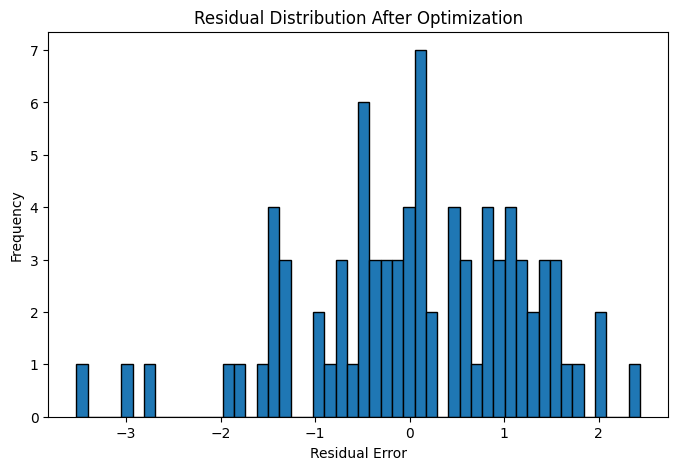

In [26]:
residuals = y_test_reg - y_reg_pred_final
plt.figure(figsize=(8, 5))
plt.hist(residuals, bins=50, edgecolor='k')
plt.xlabel("Residual Error")
plt.ylabel("Frequency")
plt.title("Residual Distribution After Optimization")
plt.show()

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from xgboost import XGBClassifier, XGBRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

In [28]:
df = pd.read_csv('data/MLE-Assignment.csv')
df = df.drop(columns=['hsi_id'])
df.head()

,0,1,2,3,4,5,6,7,8,9,...,439,440,441,442,443,444,445,446,447,vomitoxin_ppb
0,0.416181,0.396844,0.408985,0.372865,0.385293,0.365390,0.355226,0.343350,0.344837,0.361567,...,0.710280,0.717482,0.715078,0.705379,0.696691,0.692793,0.711369,0.697679,0.704520,1100.0
1,0.415797,0.402956,0.402564,0.396014,0.397192,0.389634,0.375671,0.363689,0.373883,0.359674,...,0.684011,0.697271,0.701995,0.696077,0.701012,0.677418,0.696921,0.696544,0.689054,1000.0
2,0.389023,0.371206,0.373098,0.373872,0.361056,0.349709,0.333882,0.330841,0.328925,0.323854,...,0.683054,0.669286,0.663179,0.676165,0.676591,0.655951,0.658945,0.670989,0.665176,1300.0
3,0.468837,0.473255,0.462949,0.459335,0.461672,0.459824,0.458194,0.427737,0.415360,0.413106,...,0.742782,0.730801,0.736787,0.730044,0.751437,0.738497,0.742446,0.754657,0.733474,1300.0
4,0.483352,0.487274,0.469153,0.487648,0.464026,0.451152,0.458229,0.440782,0.426193,0.430482,...,0.770227,0.773013,0.761431,0.763488,0.762473,0.744012,0.775486,0.760431,0.751988,220.0


In [29]:
df['log_vomitoxin'] = np.log1p(df['vomitoxin_ppb'])
df['is_contaminated'] = (df['vomitoxin_ppb'] > 0).astype(int)

In [30]:
X = df.drop(columns=['vomitoxin_ppb', 'log_vomitoxin', 'is_contaminated'])
y_class = df['is_contaminated']
y_reg = df[df['is_contaminated'] == 1]['log_vomitoxin']

In [31]:
X_train, X_test, y_class_train, y_class_test = train_test_split(X, y_class, test_size=0.2, random_state=42)

In [32]:

clf_selected = XGBClassifier(
    n_estimators=200,
    max_depth=7,
    learning_rate=0.05,
    colsample_bytree=0.8,
    subsample=0.8,
    reg_lambda=10,
    reg_alpha=5,
    random_state=42
)
clf_selected.fit(X_train, y_class_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.05, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=7,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=200,
              n_jobs=None, num_parallel_tree=None, ...)

In [33]:
df_contaminated = df[df['is_contaminated'] == 1]
X_reg = df_contaminated.drop(columns=['vomitoxin_ppb', 'log_vomitoxin', 'is_contaminated'])
y_reg = df_contaminated['log_vomitoxin']

scaler = StandardScaler()
X_reg_scaled = scaler.fit_transform(X_reg)

X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg_scaled, y_reg, test_size=0.2, random_state=42)

reg_xgb_selected = XGBRegressor(
    colsample_bytree=0.7,
    learning_rate=0.01,
    max_depth=6,
    n_estimators=500,
    subsample=0.7,
    random_state=42
)
reg_xgb_selected.fit(X_train_reg, y_train_reg)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.7, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.01, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=6,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=500,
             n_jobs=None, num_parallel_tree=None, ...)

In [34]:
y_class_pred = clf_selected.predict(X_test)
y_pred_final = np.zeros_like(y_class_pred, dtype=float)

In [35]:
contaminated_indices = np.where(y_class_pred == 1)[0]
contaminated_indices



array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])

In [37]:
if len(contaminated_indices) > 0:
    X_test_reg_selected = scaler.transform(X_test.iloc[contaminated_indices])
    y_reg_pred_log = reg_xgb_selected.predict(X_test_reg_selected)
    y_pred_final[contaminated_indices] = np.expm1(y_reg_pred_log)  

y_true = df.loc[X_test.index, "vomitoxin_ppb"]

rmse = mean_squared_error(y_true, y_pred_final)
r2 = r2_score(y_true, y_pred_final)

print(f"Combined Classification + Regression Model 🔹")
print(f"RMSE: {rmse:.4f}")
print(f"R² Score: {r2:.4f}")

Combined Classification + Regression Model 🔹
RMSE: 18558154.5967
R² Score: 0.9336


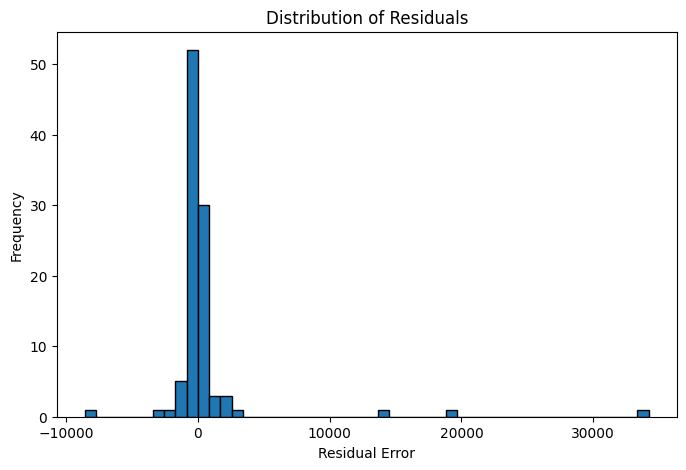

In [38]:
residuals = y_true - y_pred_final
plt.figure(figsize=(8, 5))
plt.hist(residuals, bins=50, edgecolor='k')
plt.xlabel("Residual Error")
plt.ylabel("Frequency")
plt.title("Distribution of Residuals")
plt.show()

In [39]:
y_true

361    1200.0
73     4400.0
374    3500.0
155    1500.0
104    3700.0
        ...  
347     600.0
86      400.0
75     1000.0
438     900.0
15      500.0
Name: vomitoxin_ppb, Length: 100, dtype: float64

In [40]:
y_pred_final

array([1.09599243e+03, 3.70930786e+03, 9.00027649e+02, 1.35999451e+03,
       3.85999561e+03, 2.27411652e+02, 1.25314294e+03, 2.63516113e+03,
       3.32118225e+02, 2.39910278e+02, 3.54679016e+02, 1.40282883e+02,
       7.59941711e+02, 4.89192413e+02, 4.88457855e+02, 5.19893408e+03,
       5.31445801e+02, 3.86399323e+02, 2.42902603e+02, 3.98540253e+02,
       3.03610443e+02, 8.90625732e+02, 2.57286285e+02, 8.53698633e+03,
       6.00735474e+02, 2.06130078e+03, 3.08964233e+02, 1.38638885e+02,
       1.80070534e+01, 9.22415894e+02, 3.79422058e+02, 3.40347504e+02,
       6.37763733e+02, 3.75864746e+03, 1.18493372e+03, 7.38835022e+02,
       8.35229675e+02, 2.96691376e+02, 2.65203857e+02, 2.35586258e+02,
       2.29615875e+02, 3.51664978e+02, 3.19956635e+02, 3.18528613e+03,
       4.01375397e+02, 3.00187408e+02, 6.70359009e+02, 7.09937402e+03,
       1.21869971e+04, 3.20492456e+03, 1.47937854e+03, 6.19355164e+02,
       1.68205371e+04, 9.31184141e+04, 1.04059778e+03, 3.73597382e+02,
      

In [72]:
len(y_true)

100

In [42]:
import joblib
joblib.dump(clf_selected, 'xgb_classifier.pkl')


['xgb_classifier.pkl']

In [43]:
joblib.dump(reg_xgb_selected,'reg_xgb_prediction.pkl')

['reg_xgb_prediction.pkl']

Consume the MOdel

In [47]:
clf_selected = joblib.load('models/xgb_classifier.pkl')
reg_xgb_selected = joblib.load('models/reg_xgb_prediction.pkl')


In [49]:

new_data = pd.read_csv('data/MLE-Assignment.csv')  # Replace with your file path


# Process the input data
new_data['log_vomitoxin'] = np.log1p(new_data['vomitoxin_ppb'])
new_data['is_contaminated'] = (new_data['vomitoxin_ppb'] > 0).astype(int)

# Drop non-numeric columns (e.g., 'hsi_id' or others that may cause issues)
new_data = new_data.drop(columns=['hsi_id'])

# Check if there are any categorical columns and encode them if necessary
# In case you have categorical columns, you can use one-hot encoding
# For example, if you have 'category_column', you would do something like this:
# new_data = pd.get_dummies(new_data, drop_first=True)

# Now, ensure all columns are numeric for the classifier and regressor
X = new_data.drop(columns=['vomitoxin_ppb', 'log_vomitoxin', 'is_contaminated'])

# Ensure that all columns in X are numeric
X = X.apply(pd.to_numeric, errors='coerce')

# Step 1: Predict contamination using the classifier
y_class_pred = clf_selected.predict(X)

# Step 2: Identify indices of contaminated samples
contaminated_indices = np.where(y_class_pred == 1)[0]

# Step 3: If there are contaminated samples, predict vomitoxin levels
y_pred_final = np.zeros_like(y_class_pred, dtype=float)

# StandardScaler for scaling the contaminated data
scaler = StandardScaler()

if len(contaminated_indices) > 0:
    # Only scale the contaminated samples
    X_reg_selected = new_data.iloc[contaminated_indices].drop(columns=['vomitoxin_ppb', 'log_vomitoxin', 'is_contaminated'])
    X_reg_scaled = scaler.fit_transform(X_reg_selected)
    
    # Predict log_vomitoxin for contaminated samples
    y_reg_pred_log = reg_xgb_selected.predict(X_reg_scaled)
    y_pred_final[contaminated_indices] = np.expm1(y_reg_pred_log)  # Convert back to original scale

# Add predictions to the new_data dataframe
new_data['predicted_vomitoxin_ppb'] = y_pred_final

# Save the predictions to a new Excel file
new_data.to_excel('predictions_output.xlsx', index=False)

print("Predictions have been successfully saved to 'predictions_output.xlsx'.")


Predictions have been successfully saved to 'predictions_output.xlsx'.


In [ ]:
# Save the predictions to a new Excel file
new_data.to_excel('predictions_output.xlsx', index=False)

print("Predictions have been successfully saved to 'predictions_output.xlsx'.")


In [ ]:
contaminated_indices = np.where(y_class_pred == 1)[0]
contaminated_indices

